In [ ]:
!pip install kmapper #install the Topology Data Analysis Library

Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import pickle
import io
import sys
import base64

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, svm
from sklearn.preprocessing import MinMaxScaler
import kmapper as km

try:
    from PIL import Image
except ImportError as e:
    print("This example requires Pillow. Run `pip install pillow` and then try again.")
    sys.exit()

First load the time-averaged data with 177 features

In [ ]:
import matplotlib
import numpy as np
import pickle


In [ ]:
numClasses = 4
if numClasses == 12:
    classNames = ['PVHA_i1', 'PVHA_i2', 'PVHA_i3', 'PVLA_i1', 'PVLA_i2', 'PVLA_i3', 'NVHA_i1', 'NVHA_i2', 'NVHA_i3',
                  'NVLA_i1', 'NVLA_i2', 'NVLA_i3']
else:
    classNames = ['PVHA', 'PVLA', 'NVHA', 'NVLA']
import os
path = "/content/gdrive/MyDrive/Colab Notebooks/DATA/DATA_" + str(numClasses) + "/"

with open(path+'Xtr_4.p', 'rb') as handle:
    Xtr=pickle.load( handle)
with open(path+'Xts_4.p', 'rb') as handle:
    Xts=pickle.load(handle)
with open(path+'yts_4.p', 'rb') as handle:
    yts= pickle.load(handle)
with open(path+'ytr_4.p', 'rb') as handle:
    ytr= pickle.load( handle)

In [ ]:
print(Xtr.shape)
print(Xts.shape)

(2136, 177)
(535, 177)


Initialize mapper

In [ ]:
# Initialize to use t-SNE with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
projected_data = mapper.fit_transform(Xtr, projection=sklearn.manifold.TSNE())


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (2136, 177)

..Projecting data using: 
	TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2136 samples in 0.079s...
[t-SNE] Computed neighbors for 2136 samples in 3.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2136
[t-SNE] Compute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

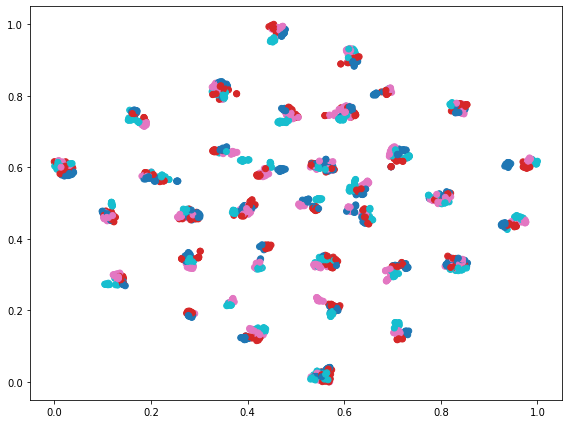

In [ ]:
from google.colab import files # for directly downloading figures from colab
fig = plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:,0],projected_data[:,1],c=ytr,cmap='tab10')

# download the pdf version of the figure
fig.tight_layout()
fig.savefig("tda_4_classes.pdf")
files.download("tda_4_classes.pdf") 

Construct the Topological Graph

In [ ]:
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
    cover=km.Cover(35, 0.4),
)

Mapping on data shaped (2136, 2) using lens shaped (2136, 2)

Creating 1225 hypercubes.

Created 254 edges and 163 nodes in 0:00:01.046842.


no display found. Using non-interactive Agg backend


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

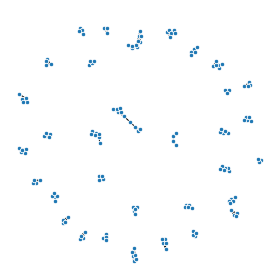

In [ ]:
# Matplotlib examples
#fig = plt.figure(figsize=(8, 6))
km.draw_matplotlib(graph, layout="spring")
plt.show()
# download the pdf version of the figure
plt.tight_layout()
plt.savefig("topograph_4_classes.pdf")
files.download("topograph_4_classes.pdf") 

In [ ]:
# Create the visualizations (increased the graph_gravity for a tighter graph-look.)
color_function_name=np.array([0])
# Tooltips with image data for every cluster member
mapper.visualize(
    graph,
    title="SentimentsMapper",
    path_html="/content/gdrive/MyDrive/Colab Notebooks/projectOutput/sentiments_custom_tooltips.html",
    color_values=ytr,
    color_function_name=np.array([0]),
)
# Tooltips with the target y-labels for every cluster member
mapper.visualize(
    graph,
    color_values=ytr,
    title="Sentiments Mapper",
    path_html="/content/gdrive/MyDrive/Colab Notebooks/projectOutput/sentiments_ylabel_tooltips.html",
    color_function_name=np.array([0]),
)
print("Output graph examples to html")

Wrote visualization to: /content/gdrive/MyDrive/Colab Notebooks/projectOutput/sentiments_custom_tooltips.html
Wrote visualization to: /content/gdrive/MyDrive/Colab Notebooks/projectOutput/sentiments_ylabel_tooltips.html
Output graph examples to html
